# Create shapefile 
Box around fields in Eschikon

In [42]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pathlib import Path

In [44]:
# Define your coordinates (eastings and northings in EPSG:2056)
coordinates = [(693290,255714),(693932,255762),(693926,255232),(693476,255182)] # epsg 21781
#[(2693283, 1255701), (2693980, 1255746), (2693460, 1255194), (2693962, 1255256)] # epsg 2056

# Create a GeoDataFrame with Point geometries
geometry = [Point(easting, northing) for easting, northing in coordinates]
gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:21781")

# Reproject to EPSG 32632
gdf = gdf.to_crs("EPSG:32632")

# Create a Polygon from the points
polygon = Polygon([(point.x, point.y) for point in gdf['geometry']])

# Create a GeoDataFrame with the Polygon geometry
gdf_polygon = gpd.GeoDataFrame(geometry=[polygon], crs="EPSG:32632")

# Save the GeoDataFrame to a shapefile
out_dir = Path('../data/auxiliary/eschikon')
output_shapefile = out_dir.joinpath("eschikon_box.shp")
gdf_polygon.to_file(output_shapefile)


In [45]:
gdf_polygon

,geometry
0,"POLYGON ((475538.336 5254735.299, 476180.884 5..."


/tmp/ipykernel_227805/4226476376.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


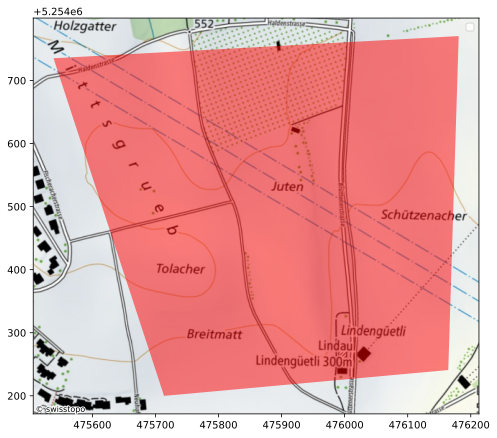

In [46]:
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
gdf_polygon.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.5, label='Polygon')
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.SwissFederalGeoportal.NationalMapColor)
ax.legend()
plt.show()